### This notebook processes this project's hypothesis 1: 
#### Electronic waste generation per capita and % of material recovery have a strong relationship with education. We will use both education attainment and education expenditure statistics to evaluate the relationship.

In [1]:
%matplotlib inline

import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
import climate_change_util as cc #Importing util file with functions as module

##### Import the data processing notebook to use the merged dataframe directly

/var/folders/74/0s3qg3912fzfj_dgytz558vr0000gn/T/ipykernel_72053/3739285020.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = clean_df.corr()
/var/folders/74/0s3qg3912fzfj_dgytz558vr0000gn/T/ipykernel_72053/633062703.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = clean_df.corr()


                                         Year  Composting%  Disposal%  \
Year                                 1.000000          NaN        NaN   
Composting%                               NaN     1.000000  -0.682426   
Disposal%                                 NaN    -0.682426   1.000000   
Landfill%                                 NaN    -0.717239   0.962077   
Material_recovery%                        NaN     0.795497  -0.839744   
Recovery%                                 NaN     0.678854  -0.999540   
Recycling%                                NaN          NaN  -0.756778   
Amt_for_recovery_operations               NaN          NaN        NaN   
Composting                                NaN          NaN        NaN   
Electronic_waste                          NaN          NaN        NaN   
Household_waste                           NaN          NaN        NaN   
Landfill                                  NaN          NaN        NaN   
Municipal_waste_generated                 NaN      

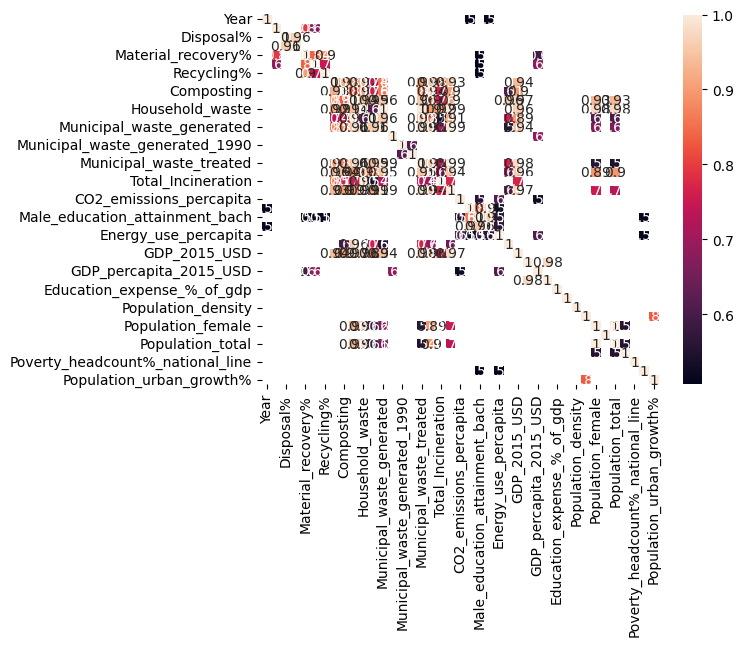

In [2]:
%run climate_change_data_processing.ipynb

In [3]:
clean_df.head()

,Year,COU,Country,Composting%,Disposal%,Landfill%,Material_recovery%,Recovery%,Recycling%,Amt_for_recovery_operations,...,Education_expense_%_of_total_exp,Population_density,Population_growth%,Population_female,Population_female_%,Population_total,Poverty_headcount%_ppp,Poverty_headcount%_national_line,Population_urban%,Population_urban_growth%
0,1990,AUT,Austria,23.171,56.277,56.277,34.529,43.723,11.358,1536.0,...,11.513110,93.042293,0.762002,4005232,52.166067,7677850,NaN,NaN,62.960,0.332494
1,1990,BEL,Belgium,5.983,66.751,43.853,11.108,33.249,5.125,1317.0,...,NaN,NaN,0.298236,5090672,51.073323,9967379,NaN,NaN,96.377,0.386473
2,1990,CHE,Switzerland,6.341,22.680,22.680,28.547,77.320,22.207,3170.6,...,17.181641,169.888411,1.026873,3437405,51.185991,6715519,NaN,NaN,73.926,0.945759
3,1990,CHN,China (People's Republic of),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,120.448249,1.467303,552721134,48.689961,1135185000,72.0,NaN,26.442,4.309678
4,1990,DEU,Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,227.517054,0.861969,41104568,51.747451,79433029,NaN,NaN,73.118,1.056365


In [4]:

#time trend plots
#hist plot
#bar graphs
#box plots for summary stats
#corr plot
#pairwise plot
#correlation matrix
#corr test (pearson)
#conclusion

In [5]:
clean_df.columns

Index(['Year', 'COU', 'Country', 'Composting%', 'Disposal%', 'Landfill%',
       'Material_recovery%', 'Recovery%', 'Recycling%',
       'Amt_for_recovery_operations', 'Composting', 'Electronic_waste',
       'Household_waste', 'Landfill', 'Municipal_waste_generated',
       'Municipal_waste_generated_percapita', 'Municipal_waste_generated_1990',
       'Municipal_waste_generated_2000', 'Municipal_waste_treated',
       'Recycling', 'Total_Incineration', 'Waste_from_households', 'Country_y',
       'CO2_emissions_percapita', 'Female_education_attainment_bach',
       'Male_education_attainment_bach', 'Total_education_attainment_bach',
       'Energy_use_percapita', 'Forest_area', 'GDP_2015_USD', 'GDP_growth%',
       'GDP_percapita_2015_USD', 'GDP_percapita_growth%',
       'Education_expense_%_of_gdp', 'Education_expense_%_of_total_exp',
       'Population_density', 'Population_growth%', 'Population_female',
       'Population_female_%', 'Population_total', 'Poverty_headcount%_ppp',
 

In [6]:
hyp1_df = pd.DataFrame(data=clean_df, columns=['Year','COU','Country','Country_y','Material_recovery%','Electronic_waste',\
                                               'Population_total','Female_education_attainment_bach','Male_education_attainment_bach',\
                                               'Total_education_attainment_bach','Education_expense_%_of_gdp',\
                                               'Education_expense_%_of_total_exp'])

In [7]:
hyp1_df.columns

Index(['Year', 'COU', 'Country', 'Country_y', 'Material_recovery%',
       'Electronic_waste', 'Population_total',
       'Female_education_attainment_bach', 'Male_education_attainment_bach',
       'Total_education_attainment_bach', 'Education_expense_%_of_gdp',
       'Education_expense_%_of_total_exp'],
      dtype='object')

In [8]:
hyp1_df['Electronic_waste_percapita'] = hyp1_df['Electronic_waste']/hyp1_df['Population_total']

In [9]:
hyp1_df.dtypes

Year                                  int64
COU                                  string
Country                              string
Country_y                            string
Material_recovery%                  float64
Electronic_waste                    float64
Population_total                      int64
Female_education_attainment_bach    float64
Male_education_attainment_bach      float64
Total_education_attainment_bach     float64
Education_expense_%_of_gdp          float64
Education_expense_%_of_total_exp    float64
Electronic_waste_percapita          float64
dtype: object

##### Hist plots

In [10]:
plot_list = hyp1_df[['Material_recovery%','Electronic_waste','Population_total','Female_education_attainment_bach',\
                    'Male_education_attainment_bach','Total_education_attainment_bach',\
                    'Education_expense_%_of_gdp','Education_expense_%_of_total_exp','Electronic_waste_percapita']]

def hist_plots(df,var): 
    plt.hist(df[var], bins='auto', color='#0504aa')
    plt.title(var)
    plt.show()
   

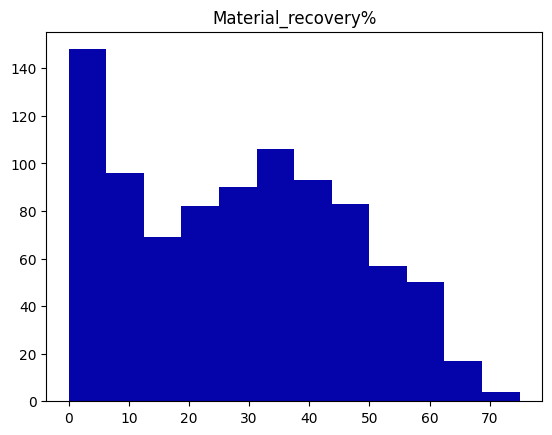

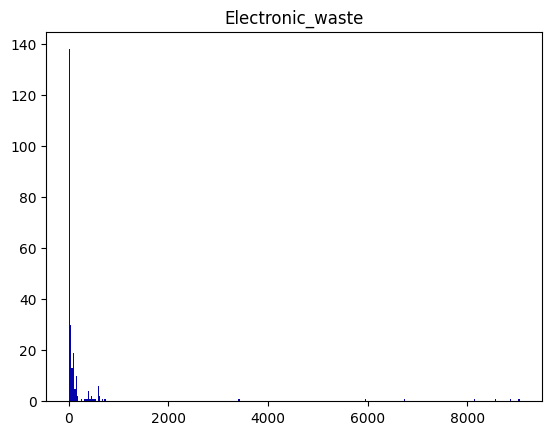

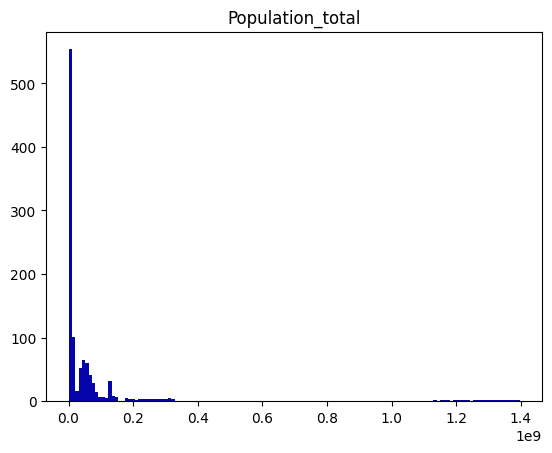

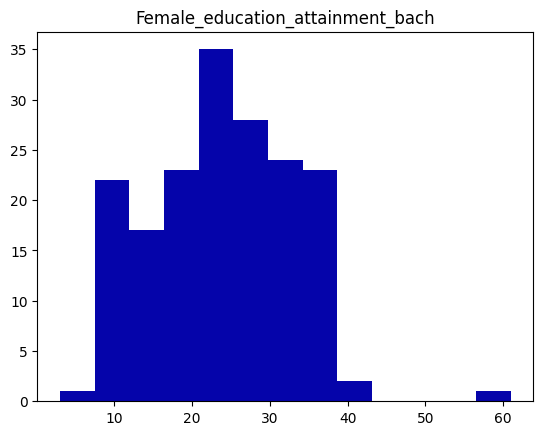

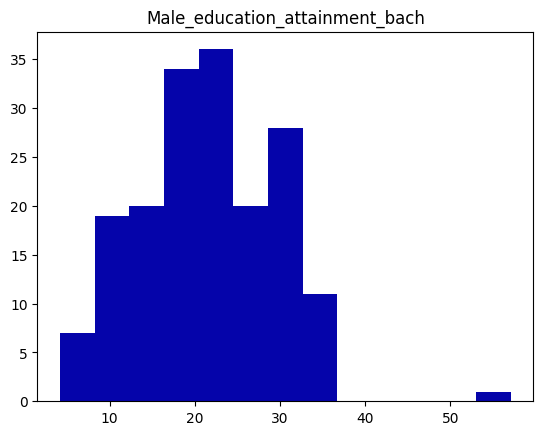

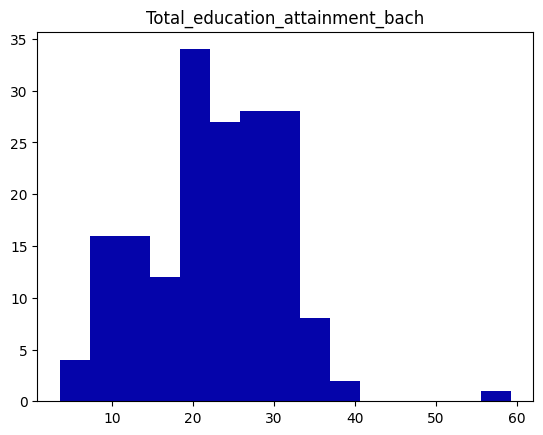

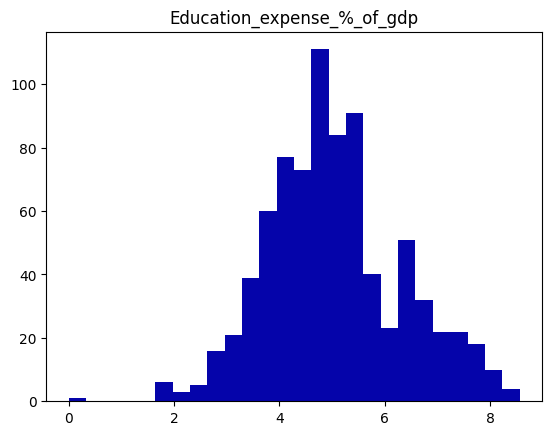

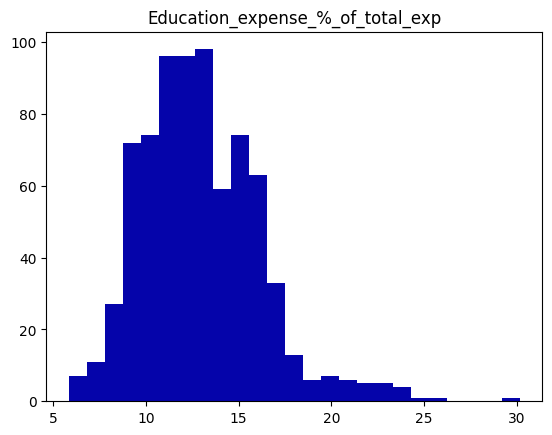

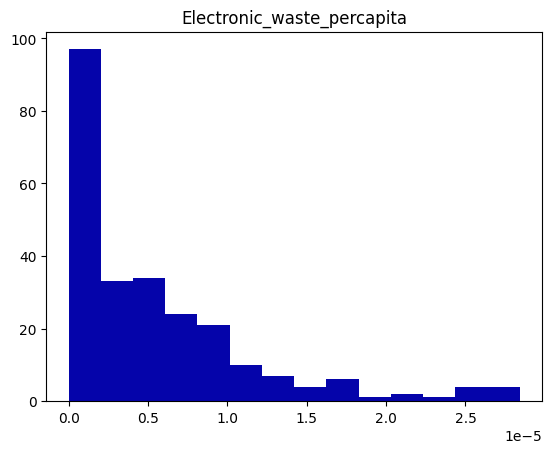

In [11]:
for var in plot_list:
    cc.hist_plots(hyp1_df,var)

##### Overall trends of variables

<AxesSubplot: xlabel='Year'>

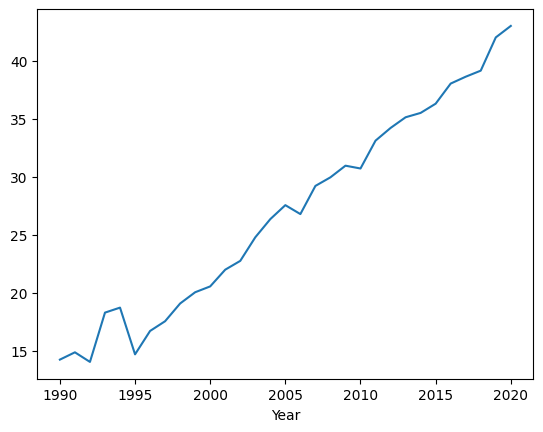

In [12]:
hyp1_df.groupby('Year')['Material_recovery%'].mean().plot()

Country
Australia                       AxesSubplot(0.125,0.11;0.775x0.77)
Austria                         AxesSubplot(0.125,0.11;0.775x0.77)
Belgium                         AxesSubplot(0.125,0.11;0.775x0.77)
Brazil                          AxesSubplot(0.125,0.11;0.775x0.77)
Canada                          AxesSubplot(0.125,0.11;0.775x0.77)
Chile                           AxesSubplot(0.125,0.11;0.775x0.77)
China (People's Republic of)    AxesSubplot(0.125,0.11;0.775x0.77)
Colombia                        AxesSubplot(0.125,0.11;0.775x0.77)
Costa Rica                      AxesSubplot(0.125,0.11;0.775x0.77)
Cyprus                          AxesSubplot(0.125,0.11;0.775x0.77)
Czech Republic                  AxesSubplot(0.125,0.11;0.775x0.77)
Denmark                         AxesSubplot(0.125,0.11;0.775x0.77)
Estonia                         AxesSubplot(0.125,0.11;0.775x0.77)
Finland                         AxesSubplot(0.125,0.11;0.775x0.77)
France                          AxesSubplot(0.125,0.11

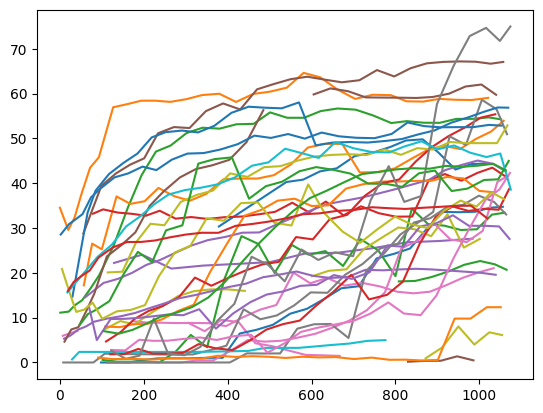

In [13]:
hyp1_df.groupby('Country')['Material_recovery%'].plot()